<a href="https://colab.research.google.com/github/MahmodulHasan-933/SoftwareProject/blob/main/classification_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Glass Type using Maching Larning**
This notebook looks into using various Python based on machine learning and data science libarires to a machine learning model which capable to identify the types of glass based on given glass component data.

We are going take following approach:
1. Problem Defination
2. Data
3. Evalution
4. Features
5. Modeling
6. Experiment


# **Preparing the tools**
We are going to use Pandas,Matplotlip and NumPy for data analysis and

In [ ]:
#Tools we need are given bellow.
#Buildin Libraries

import numpy as np #Work for Array
import pandas as pd #Work for pre-processing
import matplotlib.pyplot as plt #Work for data visualize
import seaborn as sns #work for data visulize.(various chart)

#We want our plots to be appeared inside the notebook
%matplotlib inline

#Models from sickit-learn(sklearn)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Models Evalutions
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

# **Load Data Frame**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PythonClassificationProject/GlassData1.csv")
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df=df.head(145)
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2


In [ ]:
df.head(10)


,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [ ]:
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df.tail()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
144,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2


In [ ]:
df.T #transpose of a dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
Id_number,1.00000,2.00000,3.00000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000,10.00000,11.00000,12.00000,13.00000,14.00000,15.00000,16.00000,17.00000,18.00000,19.00000,20.00000,21.0000,22.00000,23.00000,24.00000,25.0000,26.00000,27.00000,28.00000,29.00000,30.00000,31.00000,32.00000,33.00000,34.00000,35.00000,36.00000,37.00000,38.00000,39.00000,40.00000,...,106.00000,107.00000,108.00000,109.00000,110.00000,111.00000,112.00000,113.00000,114.00000,115.00000,116.00000,117.00000,118.00000,119.00000,120.00000,121.00000,122.00000,123.00000,124.00000,125.00000,126.00000,127.00000,128.00000,129.00000,130.0000,131.00000,132.00000,133.00000,134.000,135.00000,136.00000,137.00000,138.00000,139.00000,140.00000,141.0000,142.00000,143.00000,144.00000,145.0000
RI,1.52101,1.51761,1.51618,1.51766,1.51742,1.51596,1.51743,1.51756,1.51918,1.51755,1.51571,1.51763,1.51589,1.51748,1.51763,1.51761,1.51784,1.52196,1.51911,1.51735,1.5175,1.51966,1.51736,1.51751,1.5172,1.51764,1.51793,1.51721,1.51768,1.51784,1.51768,1.51747,1.51775,1.51753,1.51783,1.51567,1.51909,1.51797,1.52213,1.52213,...,1.52475,1.53125,1.53393,1.52222,1.51818,1.52664,1.52739,1.52777,1.51892,1.51847,1.51846,1.51829,1.51708,1.51673,1.51652,1.51844,1.51663,1.51687,1.51707,1.52177,1.51872,1.51667,1.52081,1.52068,1.5202,1.52177,1.52614,1.51813,1.518,1.51811,1.51789,1.51806,1.51711,1.51674,1.51674,1.5169,1.51851,1.51662,1.51709,1.5166
Na,13.64000,13.89000,13.53000,13.21000,13.27000,12.79000,13.30000,13.15000,14.04000,13.00000,12.72000,12.80000,12.88000,12.86000,12.61000,12.81000,12.68000,14.36000,13.90000,13.02000,12.8200,14.77000,12.78000,12.81000,13.3800,12.98000,13.21000,12.87000,12.56000,13.08000,12.65000,12.84000,12.85000,12.57000,12.69000,13.29000,13.89000,12.74000,14.21000,14.21000,...,11.45000,10.73000,12.30000,14.43000,13.72000,11.23000,11.02000,12.64000,13.46000,13.10000,13.41000,13.24000,13.72000,13.30000,13.56000,13.25000,12.93000,13.23000,13.48000,13.20000,12.93000,12.94000,13.78000,13.55000,13.9800,13.75000,13.70000,13.43000,13.710,13.33000,13.19000,13.00000,12.89000,12.79000,12.87000,13.3300,13.20000,12.85000,13.00000,12.9900
Mg,4.49000,3.60000,3.55000,3.69000,3.62000,3.61000,3.60000,3.61000,3.58000,3.60000,3.46000,3.66000,3.43000,3.56000,3.59000,3.54000,3.67000,3.85000,3.73000,3.54000,3.5500,3.75000,3.62000,3.57000,3.5000,3.54000,3.48000,3.48000,3.52000,3.49000,3.56000,3.50000,3.48000,3.47000,3.54000,3.45000,3.53000,3.48000,3.82000,3.82000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3.83000,3.97000,3.89000,3.90000,3.68000,3.64000,3.57000,3.76000,3.54000,3.54000,3.48000,3.68000,3.66000,3.61000,2.28000,2.09000,1.3500,1.01000,0.00000,3.98000,3.930,3.85000,3.90000,3.80000,3.62000,3.52000,3.56000,3.5400,3.63000,3.51000,3.47000,3.1800
Al,1.10000,1.36000,1.54000,1.29000,1.24000,1.62000,1.14000,1.05000,1.37000,1.36000,1.56000,1.27000,1.40000,1.27000,1.31000,1.23000,1.16000,0.89000,1.18000,1.69000,1.4900,0.29000,1.29000,1.35000,1.1500,1.21000,1.41000,1.33000,1.43000,1.28000,1.30000,1.14000,1.23000,1.38000,1.34000,1.21000,1.32000,1.35000,0.47000,0.47000,...,1.88000,2.10000,1.00000,1.00000,0.56000,0.77000,0.75000,0.67000,1.26000,1.19000,1.33000,1.41000,1.81000,1.53000,1.47000,1.32000,1.62000,1.48000,1.71000,1.15000,1.56000,1.26000,1.43000,1.67000,1.6300,1.36000,1.36000,1.18000,1.540,1.25000,1.30000,1.08000,1.57000,1.54000,1.64000,1.6100,1.07000,1.44000,1.79000,1.2300
Si,71.78000,72.73000,72.99000,72.61000,73.08000,72.97000,73.09000,73.24000,72.08000,72.99000,73.20000,73.01000,73.28000,73.21000,73.29000,73.24000,73.11000,71.36000,72.12000,72.73000,72.7500,72.02000,72.79000,73.02000,72.8500,73.00000,72.64000,73.04000,73.15000,72.86000,73.08000,73.27000,72.97000,73.39000,72.95000,72.74000,71

In [ ]:
df.shape #(Number of row,Number of column)

(145, 11)

In [ ]:
#Let's find out how many of each class there
df["Type_of_glass"].value_counts()

2    75
1    70
Name: Type_of_glass, dtype: int64

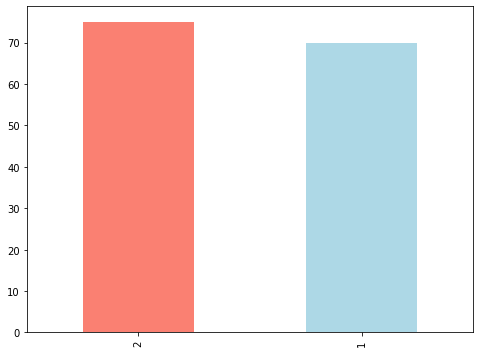

In [ ]:
df["Type_of_glass"].value_counts().plot(figsize=(8,6),kind="bar", color=["salmon", "lightblue"])

In [ ]:
df.info() # Data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_number      145 non-null    int64  
 1   RI             145 non-null    float64
 2   Na             145 non-null    float64
 3   Mg             145 non-null    float64
 4   Al             145 non-null    float64
 5   Si             145 non-null    float64
 6   K              145 non-null    float64
 7   Ca             145 non-null    float64
 8   Ba             145 non-null    float64
 9   Fe             145 non-null    float64
 10  Type_of_glass  145 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 12.6 KB


In [ ]:
# Are there any missing values? Let's check!!
df.isna().sum()

Id_number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [ ]:
df.describe()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,73.000000,1.518668,13.176552,3.263172,1.291379,72.608414,0.484828,8.942966,0.032483,0.066897,1.517241
std,42.001984,0.003162,0.593953,0.935116,0.321899,0.654937,0.217166,1.449291,0.268511,0.096332,0.501435
min,1.000000,1.512150,10.730000,0.000000,0.290000,69.810000,0.000000,7.080000,0.000000,0.000000,1.000000
25%,37.000000,1.516740,12.860000,3.430000,1.150000,72.220000,0.390000,8.150000,0.000000,0.000000,1.000000
50%,73.000000,1.517750,13.190000,3.540000,1.300000,72.780000,0.570000,8.530000,0.000000,0.000000,2.000000
75%,109.000000,1.519090,13.480000,3.640000,1.490000,73.030000,0.620000,9.030000,0.000000,0.140000,2.000000
max,145.000000,1.533930,14.860000,4.490000,2.120000,74.450000,1.100000,16.190000,3.150000,0.340000,2.000000


# **Glass Frequency according to Type of glass**

In [ ]:
df["Type_of_glass"].value_counts() #Number of Types_of_glass.

2    75
1    70
Name: Type_of_glass, dtype: int64

In [ ]:
pd.crosstab(df.Type_of_glass,df.Ba) # How much Bariliam are used for two Types of Glass?

Ba,0.00,0.06,0.09,0.11,0.14,0.27,0.69,3.15
Type_of_glass,,,,,,,,
1,67,0,1,1,0,0,1,0
2,69,1,1,1,1,1,0,1


Text(0.5, 1.0, 'Amount of Bariliam in two types of Glass.')

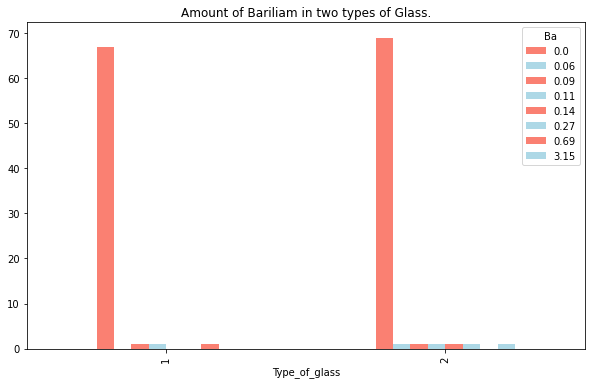

In [ ]:
#Creative a plot of crosstab
pd.crosstab(df.Type_of_glass,df.Ba).plot(figsize=(10,6),kind="bar", color=["salmon", "lightblue"])
plt.title("Amount of Bariliam in two types of Glass.")

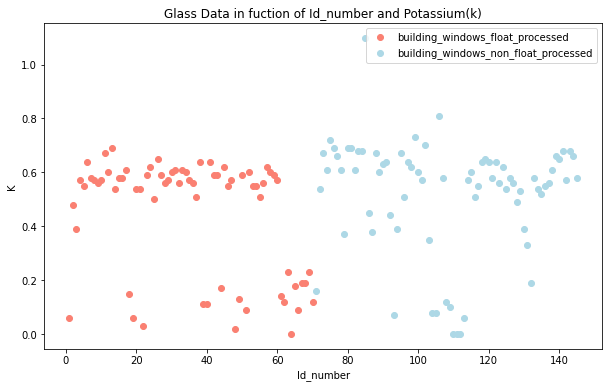

In [ ]:
#Create Another Figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.Id_number[df.Type_of_glass==1],df.K[df.Type_of_glass==1],c="salmon")

# Scatter with negative examples
plt.scatter(df.Id_number[df.Type_of_glass==2],df.K[df.Type_of_glass==2],c="lightblue")

# Adding figure labels and titles
plt.title("Glass Data in fuction of Id_number and Potassium(k)")
plt.xlabel("Id_number")
plt.ylabel("K")
plt.legend(["building_windows_float_processed", "building_windows_non_float_processed"]);

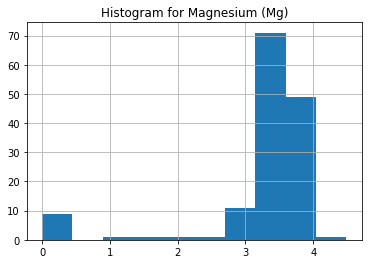

In [ ]:
#Create a histogram for Magnasium (Mg).
plt.title("Histogram for Magnesium (Mg)")
df["Mg"].hist() 


In [ ]:
#Make a correlation matrix
df.corr()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
Id_number,1.000000,0.129367,-0.079883,-0.309094,0.213664,-0.116057,0.046784,0.199723,0.076563,0.155275,0.865531
RI,0.129367,1.000000,-0.108828,-0.585466,-0.464579,-0.698220,-0.636469,0.888246,0.330895,0.086664,-0.015334
Na,-0.079883,-0.108828,1.000000,0.337450,-0.233749,-0.327035,-0.321781,-0.306602,-0.314139,-0.238597,-0.107290
Mg,-0.309094,-0.585466,0.337450,1.000000,0.031001,0.155554,0.258588,-0.837063,-0.286761,-0.162435,-0.299874
Al,0.213664,-0.464579,-0.233749,0.031001,1.000000,0.166296,0.691918,-0.386458,0.216248,0.076841,0.384050
Si,-0.116057,-0.698220,-0.327035,0.155554,0.166296,1.000000,0.434199,-0.456660,-0.372718,-0.079329,-0.015881
K,0.046784,-0.636469,-0.321781,0.258588,0.691918,0.434199,1.000000,-0.555637,0.014191,0.090945,0.166951
Ca,0.199723,0.888246,-0.306602,-0.837063,-0.386458,-0.456660,-0.555637,1.000000,0.241342,0.152874,0.097446
Ba,0.076563,0.330895,-0.314139,-0.286761,0.216248,-0.372718,0.014191,0.241342,1.000000,0.184474,0.071373
Fe,0.155275,0.086664,-0.238597,-0.162435,0.076841,-0.079329,0.090945,0.152874,0.184474,1.000000,0.099594


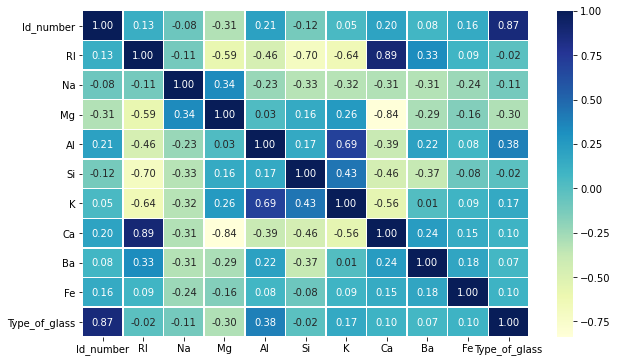

In [ ]:

#Let's visualize the corr matrix
plt.figure(figsize=(10,6))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,
fmt=".2f",cmap="YlGnBu")

# **Modeling**

In [ ]:
df

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2


In [ ]:
# Splitting data into X and Y
X=df.drop("Type_of_glass",axis=1)
Y=df["Type_of_glass"]

In [ ]:
X

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25
143,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
140    2
141    2
142    2
143    2
144    2
Name: Type_of_glass, Length: 145, dtype: int64

In [ ]:
# Splitting X and Y into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
133,134,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.0,0.15
96,97,1.51841,13.02,3.62,1.06,72.34,0.64,9.13,0.0,0.15
108,109,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.0,0.08
130,131,1.52177,13.75,1.01,1.36,72.19,0.33,11.14,0.0,0.00
67,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
...,...,...,...,...,...,...,...,...,...,...
127,128,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.0,0.17
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
112,113,1.52777,12.64,0.00,0.67,72.02,0.06,14.40,0.0,0.00
101,102,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00


In [ ]:
X_test.shape

(29, 10)

In [ ]:
X_train.shape

(116, 10)

In [ ]:
Y_train.shape

(116,)

In [ ]:
Y_test.shape

(29,)

In [ ]:
# Put models in a dictionary 
models = {"GaussianNB": GaussianNB(),"KNN": KNeighborsClassifier(),"Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates give machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42) #random.seed() here generates a random number within 42
    
    # Make a empty dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train, X_test, Y_train, Y_test)
model_scores

{'GaussianNB': 0.8620689655172413,
 'KNN': 0.9655172413793104,
 'Random Forest': 0.9310344827586207}

In [ ]:
df #drop() doesn't change the orginal dataframe

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...
140,141,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2
141,142,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
143,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
